# Classification

Classification is a type of supervised learning task where the goal is to predict the category or class label of new observations based on past observations with known class labels.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Classification Problems

Examples of classification problems are things like: identifying email as Spam or Not Spam or determining if a tumor is malignant or benign. In particular, these are examples of *binary* classification where there are two possible outcomes.  Outcomes can be  described in pairs of 'positive'/'negative' such as 'yes'/'no, 'true'/'false' or '1'/'0'. 

Plots of classification data sets often use symbols to indicate the outcome of an example. In the plots below, 'X' is used to represent the positive values while 'O' represents negative outcomes. 

In [2]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

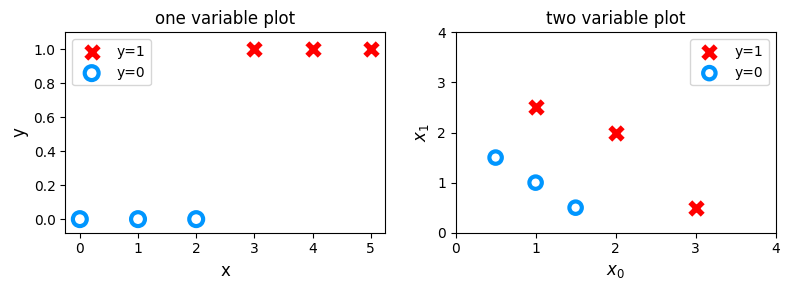

In [3]:
pos = y_train == 1
neg = y_train == 0
fig,ax = plt.subplots(1,2,figsize=(8,3))

ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1", lw=4)
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, facecolor='none', edgecolors='#0096ff', label="y=0", lw=3)
ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

pos = pos.reshape(-1,)  #work with 1D or 1D y vectors
neg = neg.reshape(-1,)

ax[1].scatter(X_train2[pos, 0], X_train2[pos, 1], marker='x', s=80, c = 'red', label="y=1", lw=4)
ax[1].scatter(X_train2[neg, 0], X_train2[neg, 1], marker='o', s=80, label="y=0", facecolors='none', edgecolors='#0096ff', lw=3)
ax[1].legend(loc='best')
ax[1].axis([0, 4, 0, 4])
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout()
plt.show()

# Logistic Regression

Logistic Regression predicts the probability that a given input belongs to a particular class. It uses mathematical function called the **sigmoid (logistic) function** to map predicted values to probabilities between 0 and 1.

## Formula for Sigmoid function

The formula for a sigmoid function is as follows -  
$$g(z) = \frac{1}{1 + e^{-z}} \tag{1}$$

where $z$ is a linear combination (output of a linear regression model) of the input features. The output of the sigmoid function can be interpreted as the probability that the input belongs to the positive class.

In [4]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1 / (1 + np.exp(-z))
   
    return g

### Let's see what the output of this function is for various value of `z`

In [5]:
# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10,11)
y = sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3) 
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


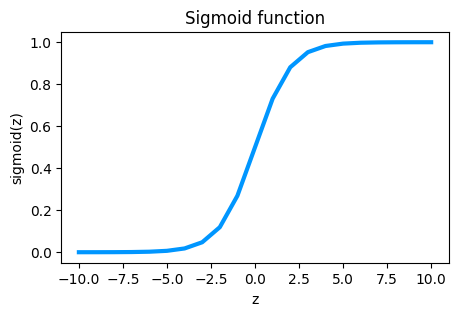

In [6]:
# Plot z vs sigmoid(z)
plt.subplots(1,1,figsize=(5,3))
plt.plot(z_tmp, y, c='#0096ff', lw=3)

plt.title("Sigmoid function")
plt.ylabel('sigmoid(z)')
plt.xlabel('z')
plt.show()

### Logistic regression and decision boundary

A logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

* Recall that for logistic regression, the model is represented as 

  $$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) \tag{1}$$

  where $g(z)$ is known as the sigmoid function and it maps all input values to values between 0 and 1:

  $$g(z) = \frac{1}{1+e^{-z}}\tag{2}$$
  and $\mathbf{w} \cdot \mathbf{x}$ is the vector dot product:
  
  $$\mathbf{w} \cdot \mathbf{x} = w_0 x_0 + w_1 x_1$$
  
  
 * We interpret the output of the model ($f_{\mathbf{w},b}(x)$) as the probability that $y=1$ given $\mathbf{x}$ and parameterized by $\mathbf{w}$ and $b$.
* Therefore, to get a final prediction ($y=0$ or $y=1$) from the logistic regression model, we can use the following heuristic -

  if $f_{\mathbf{w},b}(x) >= 0.5$, predict $y=1$
  
  if $f_{\mathbf{w},b}(x) < 0.5$, predict $y=0$
  
  
* Let's plot the sigmoid function to see where $g(z) >= 0.5$

* As you can see, $g(z) >= 0.5$ for $z >=0$

* For a logistic regression model, $z = \mathbf{w} \cdot \mathbf{x} + b$. Therefore,

  if $\mathbf{w} \cdot \mathbf{x} + b >= 0$, the model predicts $y=1$
  
  if $\mathbf{w} \cdot \mathbf{x} + b < 0$, the model predicts $y=0$
  
  
  
### Plotting decision boundary

Now, let's go back to our example to understand how the logistic regression model is making predictions.

* Our logistic regression model has the form

  $f(\mathbf{x}) = g(-3 + x_0+x_1)$


* From what you've learnt above, you can see that this model predicts $y=1$ if $-3 + x_0+x_1 >= 0$

Let's see what this looks like graphically. We'll start by plotting $-3 + x_0+x_1 = 0$, which is equivalent to $x_1 = 3 - x_0$.


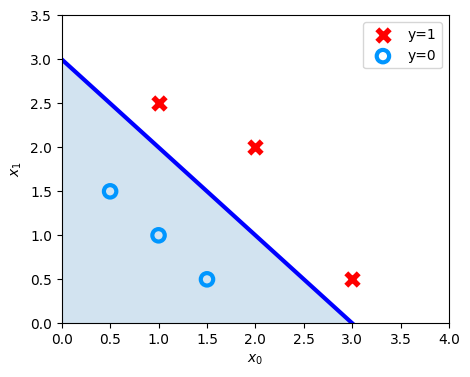

In [7]:
# Choose values between 0 and 6
x0 = np.arange(0,6)

x1 = 3 - x0 # the linear line, x0 + x1 - 3 = 0
fig,ax = plt.subplots(1,1,figsize=(5,4))
# Plot the decision boundary
ax.plot(x0,x1, c="b", lw=3)
ax.axis([0, 4, 0, 3.5])

# Fill the region below the line
ax.fill_between(x0,x1, alpha=0.2)

# Plot the original data
ax.scatter(X_train2[pos, 0], X_train2[pos, 1], marker='x', s=80, c = 'red', label="y=1", lw=4)
ax.scatter(X_train2[neg, 0], X_train2[neg, 1], marker='o', s=80, label="y=0", facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best')
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()